<a href="https://colab.research.google.com/github/c-c-c-c/cousera_kaggle/blob/master/PandasBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

ModuleNotFoundError: ignored

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# DATA_FOLDER = '../data/final_project_data/'
DATA_FOLDER = '/content/drive/My Drive/Colab Notebooks/cousera/how_to_win_kaggle/data/competitive-data-science-predict-future-sales/'


transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [16]:
grader = Grader()

NameError: ignored

# Task


Let's start with a simple task. 


<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [17]:
transactions.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [0]:
transactions['date'] = pd.to_datetime(transactions['date'])


In [0]:
transactions["date_f"] = transactions.date.dt.strftime('%Y%m')
# str(transactions.date.dt.year) + str(transactions.date.dt.month)

In [20]:
transactions["date_f"]

0          201302
1          201303
2          201305
3          201306
4          201301
            ...  
2935844    201510
2935845    201509
2935846    201510
2935847    201510
2935848    201503
Name: date_f, Length: 2935849, dtype: object

Now use your `pandas` skills to get answers for the following questions. 

The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [0]:
transactions.head

transactions["sales"] = transactions["item_price"] * transactions["item_cnt_day"]

In [22]:
transactions[ transactions["date_f"] == "201409"].groupby('shop_id')["sales"].sum().sort_values(ascending=False).iloc[1]

6784135.0

In [0]:
# YOUR CODE GOES HERE

max_revenue = transactions[ transactions["date_f"] == "201409"].groupby('shop_id')["sales"].sum().sort_values(ascending=False).iloc[1]

In [24]:
grader.submit_tag('max_revenue', max_revenue)

NameError: ignored

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
  
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [0]:
trans_merged = pd.merge(transactions, items, on='item_id', how='left')

In [0]:
trans_merged_14s = trans_merged[(trans_merged.date_f == "201406") |(trans_merged.date_f == "201407") | (trans_merged.date_f == "201408")]

In [27]:
trans_merged_14s.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'date_f', 'sales', 'item_name', 'item_category_id'],
      dtype='object')

In [28]:
trans_merged_14s.groupby("item_category_id")["sales"].sum().sort_values(ascending=False).iloc[1]

34222996.88999999

In [29]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = trans_merged_14s.groupby("item_category_id")["sales"].sum().sort_values(ascending=False).iloc[1]
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

NameError: ignored

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [35]:
transactions.groupby("item_id")["item_price"].mean()

item_price_dic = {}
change_price_item_ids = []

for i in range(len (transactions)):
    # print(i)
    # transactions["price"].iloc[i] 
    tmp_id = transactions["item_id"].iloc[i] 
    if tmp_id in  item_price_dic.keys():
        # print("exists")
        if item_price_dic[tmp_id] != transactions["item_price"].iloc[i]:
            change_price_item_ids.append(tmp_id)
    else:
        item_price_dic[tmp_id] = transactions["item_price"].iloc[i]   


print(set(change_price_item_ids))



KeyboardInterrupt: ignored

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 36,
 37,
 38,
 39,
 45,
 46,
 47,
 49,
 50,
 56,
 57,
 58,
 60,
 62,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 86,
 87,
 90,
 91,
 92,
 94,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 112,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 200,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 209,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 227,
 229,
 231,
 232,
 233,
 234,
 235,
 236,


In [0]:
# YOUR CODE GOES HERE

num_items_constant_price = list( set(transactions.item_id.unique()) - set(change_price_item_ids)  )
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [0]:
tmp_grouped = transactions[(transactions["shop_id"]==25) & (transactions["date_f"]=="201412")].groupby("date")["item_cnt_day"].sum()

In [58]:
tmp_grouped.index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12',
               '2014-12-13', '2014-12-14', '2014-12-15', '2014-12-16',
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-20',
               '2014-12-21', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-25', '2014-12-26', '2014-12-27', '2014-12-28',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [61]:
len(tmp_grouped.values)

30

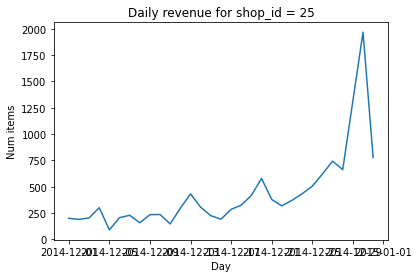

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: divide by zero encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [62]:
shop_id = 25

total_num_items_sold = tmp_grouped.values
days = tmp_grouped.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(tmp_grouped.values,  ddof=31)
# PUT YOUR ANSWER IN THIS VARIABLE
# grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [0]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

In [0]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)